### Жарова Мария
#### группа Б05-903

### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

Text(0, 0.5, 'Количество хищников')

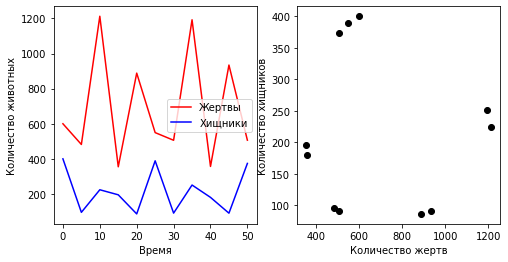

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 11)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

#### Ответ:

По рисунку можно предположить, что фазовым портретом будет эллипс (или максимально близкий к нему фокус).
Система совершает колебания вокруг стационарного значения, которое можно вычислить из условий равенства нулю первых производных x и y: 

$x = \frac{d}{c}, y = \frac{a}{b}$

Т.к. процесс колебательный, на эллипсе совпадут некоторые точки $t_0$ и $t_0 + T$, где $T$ - период $\Rightarrow$ наибольшая точность при построении графика будет достингута, если ни один узел сетки не является целым числом периодов. 

Из аналитической оценки системы при малых отклонениях (такие, что $(x - x_{стац})^2 \approx 0$) период равен $\frac{2\pi}{ \sqrt{ad}}$ ($\approx$11.87 в нашем случае). Если же не пренебрегать отклонениями от стационарного значения выше 1 степени,  в формулу войдут коэффициенты b и c. 

Отметим также, что если в качестве начальной точки выбрать станционарную, система будет оставаться в ней сколь угодно долго, и тогда достаточно 1 узла. В нашем случае оптимальное число узлов, приходящееся на один периодравняется 25; а в общем случае оно зависит от количества периодов, приходящегося на длину исследуемого отрезка, разницы между $x_0$ и $x_{стац}$, а также от констант a, d (обратно пропорционально) и b, c(прямо пропорционально).

### Часть 2. Метод высокого порядка

Задание: 
1. выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и третьего порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

***ваш ответ***

In [2]:
# метод Рунге-Кутта 1-го порядка
def RK_1ord(xy_vec0, t, check = 1):
    res = [xy_vec0]
    F = 0
    for i in range(len(t) - 1):
        h = t[i + 1] - t[i]
        k0 = np.array(f(res[i], t[i]))
        k1 = np.array(f(res[i] + k0 * h / 3, t[i] + h / 3))
        tmp = res[i] + h * k1
        # проверка
        if check:
            if (abs(tmp[0] - tmp[1]) > 2000) or (tmp[1] < 0 or tmp[0] < 0):
                F = 1
        res.append([tmp[0], tmp[1]])
    return res, F

$b_2 = 1,\\ c = \frac{1}{3},\\ a_{21} = \frac{1}{3}$

In [3]:
# метод Рунге-Кутта  3-го порядка
def RK_3ord(xy_vec0, t, check = 1):
    res = [xy_vec0]
    F = 0
    for i in range(len(t) - 1):
        h = t[i + 1] - t[i]
        time = float(t[i])
        k1 = np.array(f(res[i], time))
        k2 = np.array(f(res[i] + k1 * h / 2, time + h / 2))
        k3 = np.array(f(res[i] + (-k1 + 2 * k2) * h, time + h))
        tmp = res[i] + (k1 + 4 * k2 + k3) * h / 6
        # проверка
        if check:
            if (abs(tmp[0] - tmp[1]) > 2000) or (tmp[1] < 0 or tmp[0] < 0):
                F = 1
        res.append([tmp[0], tmp[1]])
    return res, F

$a_{21} = \frac{1}{3},\\ c_1 = 0,\\ c_2 = \frac{1}{3},\\ a_{31} = -1,\\ a_{32} = 2,\\ c_3 = 1,\\ b_1 = \frac{1}{6},\\ b_2 = \frac{1}{6},\\ b_3 =\frac{1}{6}$

<ipython-input-1-2fc34b317d88>:11: RuntimeWarning: overflow encountered in double_scalars
  return [a*x - b*x*y, c*x*y - d*y]
<ipython-input-1-2fc34b317d88>:11: RuntimeWarning: invalid value encountered in double_scalars
  return [a*x - b*x*y, c*x*y - d*y]
<ipython-input-3-961bb82f1f77>:10: RuntimeWarning: invalid value encountered in add
  k3 = np.array(f(res[i] + (-k1 + 2 * k2) * h, time + h))


Text(0, 0.5, 'Количество хищников')

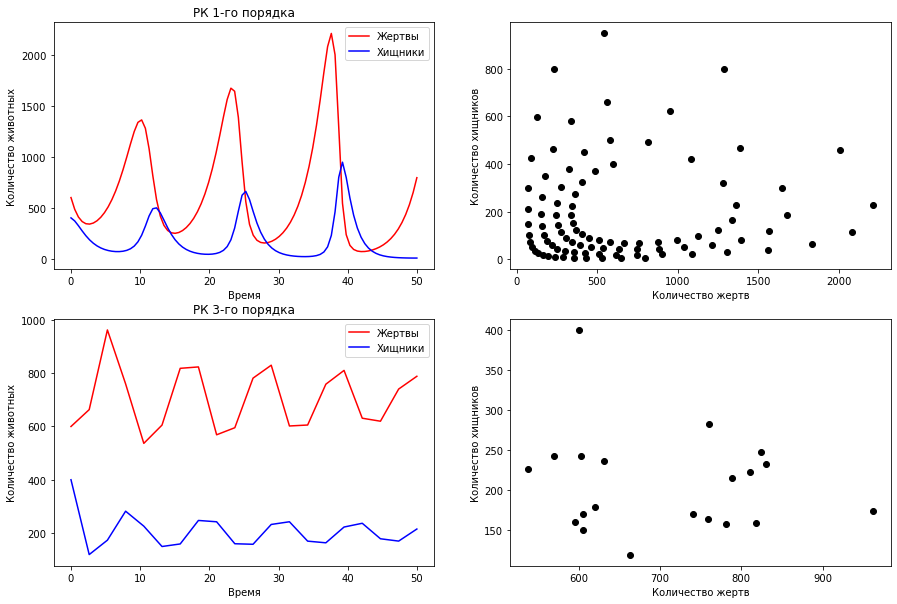

In [27]:
# Найдём оптимальное количество узлов для каждого метода и построим графики:
xy_vec0 = [600, 400]

# для 1-го порядка
n1 = 2 # сетка
check = 1 # параметр для провеки
while(n1<1000 and check == 1):
    n1 +=1
    t = np.linspace(0, 50, n1)
    rk1, check = RK_1ord(xy_vec0, t)
    rk1 =np.array(rk1) 

# для 3-го порядка
n3 = 2 # сетка
check = 1 # параметр для провеки
while(n3<1000 and check == 1):
    n3 +=1
    t = np.linspace(0, 50, n3)
    rk3, check = RK_3ord(xy_vec0, t)
    rk3 =np.array(rk3)    

# Построение графиков
t = np.linspace(0, 50, n1)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].plot(t, rk1[:, 0], 'r', label="Жертвы")
axes[0, 0].plot(t, rk1[:, 1], 'b', label="Хищники")
axes[0, 0].set_xlabel("Время")
axes[0, 0].set_ylabel("Количество животных")
axes[0, 0].set_title("РК 1-го порядка")
axes[0, 0].legend()
axes[0,1].plot(rk1[:, 0], rk1[:, 1], 'ko')
axes[0,1].set_xlabel("Количество жертв")
axes[0,1].set_ylabel("Количество хищников")

t = np.linspace(0, 50, n3)
axes[1,0].plot(t, rk3[:, 0], 'r', label="Жертвы")
axes[1,0].plot(t, rk3[:, 1], 'b', label="Хищники")
axes[1,0].set_xlabel("Время")
axes[1,0].set_ylabel("Количество животных")
axes[1,0].set_title("РК 3-го порядка")
axes[1,0].legend()
axes[1,1].plot(rk3[:, 0], rk3[:, 1], 'ko')
axes[1,1].set_xlabel("Количество жертв")
axes[1,1].set_ylabel("Количество хищников")

Text(0, 0.5, 'Количество хищников')

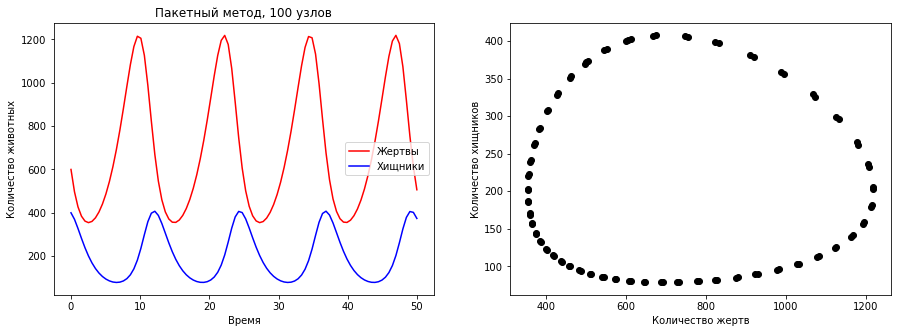

In [26]:
# сравним с результатми пакетного метода
xy_vec0 = [600, 400]
t = np.linspace(0, 50, 100)
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(t, xy_t[:, 0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:, 1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].set_title("Пакетный метод, 100 узлов")
axes[0].legend()
axes[1].plot(xy_t[:, 0], xy_t[:, 1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")
#plt.subplots_adjust(wspace=0.2, hspace=0.4)

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. 

In [40]:
def p_h(h):
    t = np.arange(0, 50, h)
    xy_t = integrate.odeint(f, x_y, t)
    # для 1 порядка
    rk1 = RK_1ord(x_y, t)[0]
    rk1 =np.array(rk1)
    err_rk1 = [max(abs(xy_t[:, 0] - rk1[:, 0])), max(abs(xy_t[:, 1] - rk1[:, 1]))]
    # для 3 порядка
    rk3 = RK_3ord(x_y, t)[0]
    rk3 =np.array(rk3)
    err_rk3 = [max(abs(xy_t[:, 0] - rk3[:, 0])), max(abs(xy_t[:, 1] - rk3[:, 1]))]
    return err_rk1, err_rk3

h = np.arange(0.01, 2.5, 0.1)
p1= []
p3 = []
for i in h:
    err_h = p_h(i)
    err_h_2 = p_h(i / 2)
    p_rk_1 = np.log((err_h[0][0] + err_h[0][1]) / (err_h_2[0][0] + err_h_2[0][1]))
    p_rk_3 = np.log((err_h[1][0] + err_h[1][1]) / (err_h_2[1][0] + err_h_2[1][1]))
    p1.append(p_rk_1)
    p3.append(p_rk_3)

<ipython-input-1-2fc34b317d88>:11: RuntimeWarning: overflow encountered in double_scalars
  return [a*x - b*x*y, c*x*y - d*y]
<ipython-input-1-2fc34b317d88>:11: RuntimeWarning: invalid value encountered in double_scalars
  return [a*x - b*x*y, c*x*y - d*y]
<ipython-input-40-98e5128668a4>:20: RuntimeWarning: invalid value encountered in double_scalars
  p_rk_1 = np.log((err_h[0][0] + err_h[0][1]) / (err_h_2[0][0] + err_h_2[0][1]))


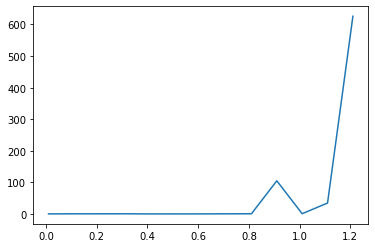

In [41]:
plt.plot(h, p1)

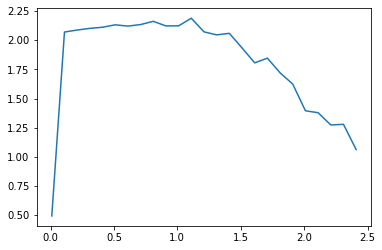

In [42]:
plt.plot(h, p3)

#### Вывод:
Для метода Рунге-Кутта первого порядка значение p равняется нулю при малых h, и резко возрастает начиная примерно с h=1. По-моему, это связано с тем, что каждое следующее значение k мы вычисляем всего в один шаг, поэтому отличий при малых h метод работает достаточно неточно. 

Для метода третьего порядка мы делаем больще итераций для нахождения новго значения, поэтому значение порядка точности метода при малых h уже не равняется нулю, а находится около значения 2; и затем начинает плавно падать, начиная с h=1 - т.к. количество узлов на отрезок уменьшается.